In [1]:
# Import necessary libraries and look at head of dataframe.
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('family_benefits_public_spending.csv')

df.head()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,NOR,FAMPUBEXP,INCASH,PC_GDP,A,1980,1.232,NaN
1,NOR,FAMPUBEXP,INCASH,PC_GDP,A,1985,1.288,NaN
2,NOR,FAMPUBEXP,INCASH,PC_GDP,A,1988,1.586,NaN
3,NOR,FAMPUBEXP,INCASH,PC_GDP,A,1989,1.709,NaN
4,NOR,FAMPUBEXP,INCASH,PC_GDP,A,1990,1.838,NaN


In [2]:
df.groupby('LOCATION').first()


,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
LOCATION,,,,,,,
AUS,FAMPUBEXP,INKIND,PC_GDP,A,1980,0.049,NaN
AUT,FAMPUBEXP,INKIND,PC_GDP,A,1980,0.363,NaN
BEL,FAMPUBEXP,TOT,PC_GDP,A,1980,2.952,NaN
CAN,FAMPUBEXP,INKIND,PC_GDP,A,1980,0.104,NaN
CHE,FAMPUBEXP,INCASH,PC_GDP,A,1980,0.912,NaN
CHL,FAMPUBEXP,TOT,PC_GDP,A,1987,0.760,NaN
COL,FAMPUBEXP,TOT,PC_GDP,A,2010,1.396,NaN
CRI,FAMPUBEXP,TOT,PC_GDP,A,2011,0.916,NaN
CZE,FAMPUBEXP,TOT,PC_GDP,A,1990,2.259,NaN


In [3]:
# Let's see if there are any alternative values in 'INDICATOR', 'MEASURE', 'FREQUENCY', or 'FLAG CODES'.
print(df['INDICATOR'].unique())
print(df['MEASURE'].unique())
print(df['FREQUENCY'].unique())
print(df['Flag Codes'].unique())


['FAMPUBEXP']
['PC_GDP']
['A']
[nan]


In [4]:
# I'll go ahead and delete those columns, since the data they provide is not informative.
del df['INDICATOR']
del df['MEASURE']
del df['FREQUENCY']
del df['Flag Codes']

df.head()


,LOCATION,SUBJECT,TIME,Value
0,NOR,INCASH,1980,1.232
1,NOR,INCASH,1985,1.288
2,NOR,INCASH,1988,1.586
3,NOR,INCASH,1989,1.709
4,NOR,INCASH,1990,1.838


In [5]:
# Since the data we deleted indicated that the 'Value' column was percent of GDP ('PC_GDP'), I'll rename it
# for future clarity.
df = df.rename(columns={'Value' : 'percent_GDP'})

df.head()


,LOCATION,SUBJECT,TIME,percent_GDP
0,NOR,INCASH,1980,1.232
1,NOR,INCASH,1985,1.288
2,NOR,INCASH,1988,1.586
3,NOR,INCASH,1989,1.709
4,NOR,INCASH,1990,1.838


In [6]:
# And let's see what's going on in the 'SUBJECT' column.
print(df['SUBJECT'].unique())


['INCASH' 'TOT' 'INKIND']


In [7]:
# Looking at the description of the dataset on https://data.oecd.org/socialexp/family-benefits-public-spending.htm,
# it looks like there might be an entry for each year, for INCASH, TOTAL, and INKIND.
# Let's look at the data to verify, then perhaps we'll just keep 'TOTAL' for simplicity.
pd.set_option('display.max_rows', 150)

print(df.loc[df['LOCATION'] == 'USA'])


     LOCATION SUBJECT  TIME  percent_GDP
942       USA     TOT  1980        0.767
943       USA     TOT  1981        0.707
944       USA     TOT  1982        0.638
945       USA     TOT  1983        0.651
946       USA     TOT  1984        0.620
947       USA     TOT  1985        0.604
948       USA     TOT  1986        0.429
949       USA     TOT  1987        0.430
950       USA     TOT  1988        0.435
951       USA     TOT  1989        0.433
952       USA     TOT  1990        0.456
953       USA     TOT  1991        0.566
954       USA     TOT  1992        0.573
955       USA     TOT  1993        0.590
956       USA     TOT  1994        0.585
957       USA     TOT  1995        0.591
958       USA     TOT  1996        0.543
959       USA     TOT  1997        0.408
960       USA     TOT  1998        0.789
961       USA     TOT  1999        0.779
962       USA     TOT  2000        0.792
963       USA     TOT  2001        0.831
964       USA     TOT  2002        0.846
965       USA   

In [8]:
# Let's just keep 'TOT'.
df.info()
df = df.loc[df['SUBJECT'] == 'TOT']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     3985 non-null   object 
 1   SUBJECT      3985 non-null   object 
 2   TIME         3985 non-null   int64  
 3   percent_GDP  3985 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 124.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 34 to 3964
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1333 non-null   object 
 1   SUBJECT      1333 non-null   object 
 2   TIME         1333 non-null   int64  
 3   percent_GDP  1333 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 52.1+ KB


C:\Users\samia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percent_GDP'>

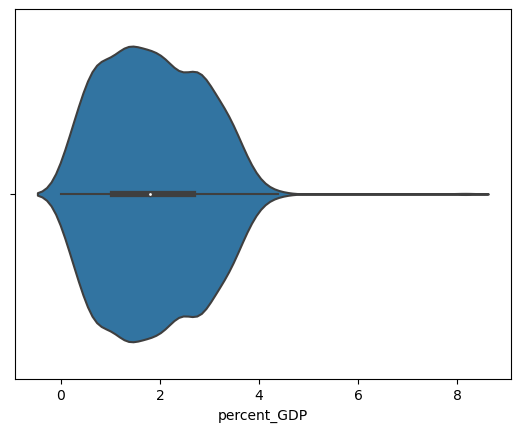

In [9]:
# Great! Let's look at some visualizations.
sns.violinplot(df['percent_GDP'])
# So VERY GENERALLY SPEAKING, it looks like, for all countries, from 1980 to 2020, most countries
# are spending between 1 and 3% of their GDP on programs that benefit families 


In [10]:
# Let's save this dataframe to use in SQL later.
df.to_csv('family_spending.csv')


In [19]:
# Here's a dataframe about gender wage inequality by country:

gender_df = pd.read_csv('GENDER_EMP.csv')
gender_df.head()

# From the Gender Wage Gap data from https://stats.oecd.org/


,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2000,2000,NaN,NaN,0,Units,NaN,NaN,9.8,NaN,NaN
1,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2005,2005,NaN,NaN,0,Units,NaN,NaN,2.0,NaN,NaN
2,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2010,2010,NaN,NaN,0,Units,NaN,NaN,5.5,NaN,NaN
3,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2015,2015,NaN,NaN,0,Units,NaN,NaN,7.5,NaN,NaN
4,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2016,2016,NaN,NaN,0,Units,NaN,NaN,10.1,NaN,NaN


In [28]:
print(gender_df['IND'].unique())
print(gender_df['SEX'].unique())
print(gender_df['Sex'].unique())
print(gender_df['AGE'].unique())
print(gender_df['Age Group'].unique())
print(gender_df['TIME'].unique())
print(gender_df['Time'].unique())
print(gender_df['Unit Code'].unique())
print(gender_df['Unit'].unique())
print(gender_df['PowerCode Code'].unique())
print(gender_df['PowerCode'].unique())
print(gender_df['Reference Period Code'].unique())
print(gender_df['Reference Period'].unique())
print(gender_df['Flag Codes'].unique())
print(gender_df['Flags'].unique())
# Looks like a lot of these fields aren't telling us much and can be deleted. 
# 'IND' tells us which percentile is being looked at (ex: the 1st decile (bottom) earners, the 9th decile (top) earners,
# or the middle (5th)).
# And 'Values' is measured in percentages. So the disparity between male and female wages in the bottom decile 
# in Australia in 2000 was 9.8%.


[nan]
[nan]


In [29]:
# So let's delete the fields that only display one value.
gender_df = gender_df.drop(columns=['SEX', 'Sex', 'AGE', 'Age Group', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

gender_df.head()


,COU,Country,IND,Indicator,TIME,Time,Value
0,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),2000,2000,9.8
1,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),2005,2005,2.0
2,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),2010,2010,5.5
3,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),2015,2015,7.5
4,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),2016,2016,10.1


<AxesSubplot:xlabel='Value', ylabel='Count'>

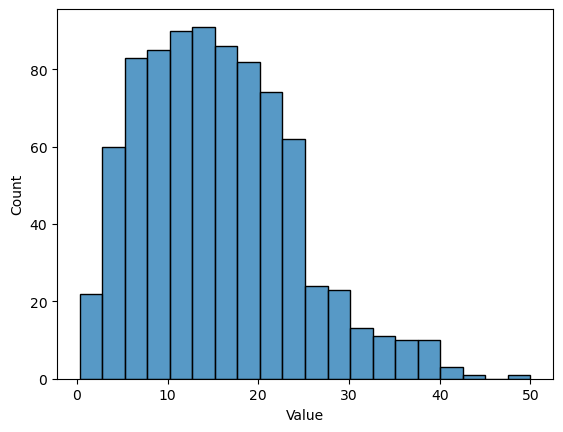

In [25]:
sns.histplot(x = gender_df['Value'])


<AxesSubplot:xlabel='TIME', ylabel='Value'>

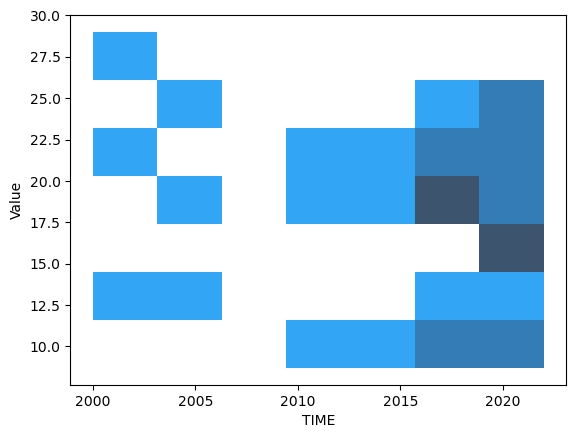

In [32]:
usa_df = gender_df.loc[gender_df['COU'] == 'USA']

sns.histplot(x = usa_df['TIME'], y = usa_df['Value'])
# Hmm... Maybe there's duplicate or triplicate data somewhere?


In [35]:
gender_df.describe()


,TIME,Time,Value
count,831.000000,831.000000,831.000000
mean,2015.205776,2015.205776,15.604212
std,6.001186,6.001186,8.493613
min,2000.000000,2000.000000,0.300000
25%,2010.000000,2010.000000,9.200000
50%,2017.000000,2017.000000,14.700000
75%,2020.000000,2020.000000,21.150000
max,2022.000000,2022.000000,50.000000


In [33]:
# Let's look at how many weeks of maternity leave each country gets.
mat_df = pd.read_csv('mat_leave.csv')
mat_df.head()


,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,1970,1970,WEEK,Weeks,0,Units,NaN,NaN,0.0,NaN,NaN
1,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,1975,1975,WEEK,Weeks,0,Units,NaN,NaN,0.0,NaN,NaN
2,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,1980,1980,WEEK,Weeks,0,Units,NaN,NaN,0.0,NaN,NaN
3,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,1985,1985,WEEK,Weeks,0,Units,NaN,NaN,0.0,NaN,NaN
4,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,Women,TOTAL,Total,1990,1990,WEEK,Weeks,0,Units,NaN,NaN,0.0,NaN,NaN


In [36]:
# Let's look at unique values again.
print(mat_df['IND'].unique())
print(mat_df['SEX'].unique())
print(mat_df['Sex'].unique())
print(mat_df['AGE'].unique())
print(mat_df['Age Group'].unique())
print(mat_df['TIME'].unique())
print(mat_df['Time'].unique())
print(mat_df['Unit Code'].unique())
print(mat_df['Unit'].unique())
print(mat_df['PowerCode Code'].unique())
print(mat_df['PowerCode'].unique())
print(mat_df['Reference Period Code'].unique())
print(mat_df['Reference Period'].unique())
print(mat_df['Flag Codes'].unique())
print(mat_df['Flags'].unique())


['EMP18_MAT' 'EMP18_PAR' 'EMP18_PAID' 'EMP18_PAT']
['WOMEN' 'MEN']
['Women' 'Men']
['TOTAL']
['Total']
[1970 1975 1980 1985 1990 1995 2000 2005 2010 2011 2013 2012 2014 2015
 2016 2017 2018 2019 2020 2021 2022]
[1970 1975 1980 1985 1990 1995 2000 2005 2010 2011 2013 2012 2014 2015
 2016 2017 2018 2019 2020 2021 2022]
['WEEK']
['Weeks']
[0]
['Units']
[nan]
[nan]
[nan]
[nan]


In [37]:
mat_df = mat_df.drop(columns=['Sex', 'AGE', 'Age Group', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])
mat_df.head()


,COU,Country,IND,Indicator,SEX,TIME,Time,Value
0,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,1970,1970,0.0
1,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,1975,1975,0.0
2,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,1980,1980,0.0
3,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,1985,1985,0.0
4,AUS,Australia,EMP18_MAT,Length of maternity leave,WOMEN,1990,1990,0.0


In [38]:
# Ok, I believe I want to look at mat_df and gender_df in SQL next. Let's export the cleaned versions.
mat_df.to_csv('mat.csv')
gender_df.to_csv('gender.csv')
